In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'


In [2]:
df = pd.read_csv("https://bit.ly/inflearn-event-text-csv")
df.shape

(2449, 1)

In [3]:
df.head()


,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
2,2020년 목표 : 리액트 공부하기
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!


In [4]:
df.tail()

,text
2444,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 ***님의 JPA 강의를 또 스..."
2445,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...
2446,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다..."
2447,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...
2448,인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론...


In [5]:
print(df.shape)
df = df.drop_duplicates(["text"], keep="last")
print(df.shape)

(2449, 1)
(2410, 1)


In [6]:
df["origin_text"] = df["text"]
df.head()

,text,origin_text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!


In [7]:
df["text"] = df["text"].str.lower()

In [8]:
print(df["text"][:1])

0    2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
Name: text, dtype: object


In [9]:
df["text"] = df["text"].str.replace("python", "퍄이썬")\
    .str.replace("pandas", "판다스")\
    .str.replace("javascript", "자바스크립트")\
    .str.replace("java", "자바")\
    .str.replace("react", "리액트")

In [10]:
df["course"] = df["text"].apply(lambda x: x.split("관심강의")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심 강의")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심 강좌")[-1])
df["course"] = df["course"].str.replace(":", "")
df["course"].head()

0    2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...
1    2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...
3                  40대 프로그래밍 시작!  우리를 위한 프로그래밍  파이썬 중급
4                       2020년 목표  돌머리 비전공자가 멋진 전공자 되기!
5                     2020 년목표 비전공자(경영)가 전공자(it) 되기!!!
Name: course, dtype: object

In [11]:
df[["text", "course"]].head()

,text,course
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 돌머리 비전공자가 멋진 전공자 되기!
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표 비전공자(경영)가 전공자(it) 되기!!!


In [12]:
search_keyword = ["머신러닝", "딥러닝", "파이썬", "판다스", "공공데이터", \
    "django", "크롤링", "시각화", "데이터분석", "웹개발", \
    "엑셀", "c", "자바", "자바스크립트", "node", \
    "vue", "리액트"]

for keyword in search_keyword:
    df[keyword] = df["course"].str.contains(keyword)
    
df.head(3)

,text,origin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
df_python = df[df["text"].str.contains("파이썬|공공데이터|판다스")].copy()
df_python.shape

(407, 20)

In [14]:
df[search_keyword].sum().sort_values(ascending=False)

c         409
파이썬       384
자바        341
자바스크립트    140
리액트       137
머신러닝      133
vue       132
node      117
크롤링        56
딥러닝        52
django     31
시각화        30
웹개발        27
데이터분석      24
엑셀         18
공공데이터      12
판다스         6
dtype: int64

In [15]:
text = df.loc[(df["공공데이터"] == True), "text"]
for t in text:
    print("-" * 20)
    print(t)

--------------------
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
파이썬의 고수가 되고싶어요
--------------------
자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 퍄이썬이 궁금합니다.
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 안에 원하는 공부 다 끝내보려고요. 내년이면 수능이라..

#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
it개발자입니다. 개발을 오래 안하고 관리만 했더니 다시 개발이 너무 하고싶습니다. 올해는 인프런을 통해서 개발쪽 스킬셋을 업그레이드 하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
파이썬 데이터분석 마스터
#관심강의:공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 졸업하는 컴퓨터공학과 학생입니다!
백엔드 혹은 데이터 엔지니어 쪽으로 취업하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
텍스트 마이닝만 수강한 뒤 현재 맡은 마케팅 업무 능률이 엄청나게 올라가는 것을 확인했으며 승진과 고가에 엄청나게 득을 보았습니다 감사합니다! 앞으로도 인프런 애용하겠습니다.
추가적으로 해 *** 강사님의 [공공데이터로 파이썬 데이터 분석 시작하기] 강의를 듣고 상권분석과 공공데이터 활용 역량을 올릴 예정입니다. 화이팅!!!
#관심강의 : 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
데이터분석 2년차가 되는데 작년에 파이썬 강의를 담아놓고 그대로 1년간 방치... 올해는 꼭 완강하고 실습해서 개발자에게 의존하지 않고 혼자 크롤링&분석 해내고 싶어요! 
#관심강의: 공공데이터로 파이썬 데이터분석 시작하기, database 1&2 - mysql
------

In [16]:
text = df.loc[(df["판다스"] == True), "text"]
for t in text:
    print("-" * 20)
    print(t)

--------------------
2020년에는 데이터분석 관련한 실력을 쌓고싶습니다!
#관심강의 : 파이썬, 판다스, 데이터분석, 머신러닝
--------------------
취미로 안드로이드 개발하는 사람입니다. 자바로 작성하다 보니, kotlin이 안드로이드 기반언어로 바뀌어서 새로 배워보려고 합니다.
관심강의 : kotlin, 판다스, 퍄이썬, c언어
--------------------
판다스 라입러리에 관심이 많아서 배워보려 합니다 #관심강의 : *** 판다스
--------------------
2020년!! 올 해는 빅데이터 분석 전문가 되기!!
#관심강의 : 파이썬, 판다스
--------------------
2020년 목표  파이썬 을  활용해  데이터 분석 작업을 진행하고 싶습니다.  관심강의:파이썬 판다스 관련 강좌 입니다
--------------------
저는 백세시대에 조금 더 오랫동안 it일을 하기위해서 it전략기획에서 데이터분석가로 커리어 전환을 준비하고 있습니다. 인프런의 수많은 좋은 강의중 파이썬 기반의 데이터분석을 공부하기 위하여 인프런을 활용하고 있습니다. 대한민국 최고의 데이터분석가 되는 그날까지 인프런과 함께 하겟습니다.
#관심강의 : 파이썬 판다스 데이터 분석과 시각화 뽀개기등 데이터분석 관련 강의


In [17]:
text = df.loc[(df["판다스"] == True), "text"]
text

541     2020년에는 데이터분석 관련한 실력을 쌓고싶습니다!\n#관심강의 : 파이썬, 판다...
690     취미로 안드로이드 개발하는 사람입니다. 자바로 작성하다 보니, kotlin이 안드로...
758            판다스 라입러리에 관심이 많아서 배워보려 합니다 #관심강의 : *** 판다스
1237      2020년!! 올 해는 빅데이터 분석 전문가 되기!!\n#관심강의 : 파이썬, 판다스
2155    2020년 목표  파이썬 을  활용해  데이터 분석 작업을 진행하고 싶습니다.  관...
2365    저는 백세시대에 조금 더 오랫동안 it일을 하기위해서 it전략기획에서 데이터분석가로...
Name: text, dtype: object

In [18]:
# 사이킷런의 CountVectorizer를 통해 벡터화
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    analyzer = "word", 
    tokenizer = None, 
    preprocessor = None, 
    stop_words = None, 
    min_df = 2, 
    ngram_range = (3, 6), 
    max_features = 2000 # 단어개수
)

vectorizer


CountVectorizer(max_features=2000, min_df=2, ngram_range=(3, 6))

In [19]:
feature_vector = vectorizer.fit_transform(df['course'])
print(feature_vector.shape)
feature_vector

(2410, 2000)


<2410x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 11173 stored elements in Compressed Sparse Row format>

In [20]:
vocab = vectorizer.get_feature_names_out()
print(len(vocab))
vocab[:5]

2000


array(['12개 만들면서 배우는', '12개 만들면서 배우는 ios', '12개 만들면서 배우는 ios 아이폰',
       '12개 만들면서 배우는 ios 아이폰 개발', '12개를 만들며 배우는'], dtype=object)

In [21]:
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab)

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
dist = np.sum(feature_vector, axis=0)
df_freq = pd.DataFrame(dist, columns=vocab)
df_freq

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,2,2,2,2,2,2,2,2,2,2,...,16,13,13,12,2,8,8,2,2,2


In [23]:
df_freq.T.sort_values(by=0, ascending=False).head(10)

,0
nodebird sns 만들기,60
스프링 데이터 jpa,59
리액트로 nodebird sns,49
머신러닝 완벽 가이드,49
리액트로 nodebird sns 만들기,49
파이썬 머신러닝 완벽,49
프로그래밍과 자바스크립트 es6,48
파이썬 머신러닝 완벽 가이드,48
함수형 프로그래밍과 자바스크립트 es6,47
2020년 공부 목표,47


In [24]:
df_freq_T = df_freq.T.reset_index()
df_freq_T.columns = ["course", "freq"]
df_freq_T.head()

,course,freq
0,12개 만들면서 배우는,2
1,12개 만들면서 배우는 ios,2
2,12개 만들면서 배우는 ios 아이폰,2
3,12개 만들면서 배우는 ios 아이폰 개발,2
4,12개를 만들며 배우는,2


In [25]:
df_freq_T["course_find"] = df_freq_T["course"].str.replace("박조은", "")
df_freq_T["course_find"] = df_freq_T["course_find"].apply(lambda x : " ".join(x.split()[:4]))
df_freq_T.sort_values(["course_find", "freq"], ascending=False).head(50)


,course,freq,course_find
1999,활용한 파이썬 프로그래밍,2,활용한 파이썬 프로그래밍
1998,활용한 메신져 만들기 android,2,활용한 메신져 만들기 android
1997,활용한 메신져 만들기,2,활용한 메신져 만들기
1996,활용한 리액트 native 개발,8,활용한 리액트 native 개발
1995,활용한 리액트 native,8,활용한 리액트 native
1994,활용한 데이터분석과 it보안,2,활용한 데이터분석과 it보안
1992,활용한 다양한 자동화 어플리케이션,13,활용한 다양한 자동화 어플리케이션
1993,활용한 다양한 자동화 어플리케이션 제작하기,12,활용한 다양한 자동화 어플리케이션
1991,활용한 다양한 자동화,13,활용한 다양한 자동화
1989,활용2 api 개발과 성능,16,활용2 api 개발과 성능


In [26]:
print(df_freq_T.shape)

df_course = df_freq_T.drop_duplicates(["course_find", "freq"], keep="first")

print(df_course.shape)

(2000, 3)
(1441, 3)


In [27]:
df_course = df_course.sort_values(by="freq", ascending=False)
df_course.head(8)

,course,freq,course_find
319,nodebird sns 만들기,60,nodebird sns 만들기
1094,스프링 데이터 jpa,59,스프링 데이터 jpa
885,리액트로 nodebird sns 만들기,49,리액트로 nodebird sns 만들기
1761,파이썬 머신러닝 완벽,49,파이썬 머신러닝 완벽
906,머신러닝 완벽 가이드,49,머신러닝 완벽 가이드
884,리액트로 nodebird sns,49,리액트로 nodebird sns
1891,프로그래밍과 자바스크립트 es6,48,프로그래밍과 자바스크립트 es6
1762,파이썬 머신러닝 완벽 가이드,48,파이썬 머신러닝 완벽 가이드


In [28]:
df_course.to_csv("./data/event-course-name-freq.csv")

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidftrans = TfidfTransformer(smooth_idf=False)
tfidftrans

TfidfTransformer(smooth_idf=False)

In [30]:
feature_tfidf = tfidftrans.fit_transform(feature_vector)
feature_tfidf.shape

(2410, 2000)

In [31]:
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq.head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용2 api 개발과 성능 최적화,활용한 다양한 자동화,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head(10)

,0
스프링 데이터 jpa,35.203215
파이썬 실전 활용,27.690173
nodebird sns 만들기,26.817724
머신러닝 완벽 가이드,24.470756
파이썬 머신러닝 완벽,24.470756
리액트로 nodebird sns,24.187518
리액트로 nodebird sns 만들기,24.187518
파이썬 머신러닝 완벽 가이드,23.569611
프로그래밍과 자바스크립트 es6,20.056301
함수형 프로그래밍과 자바스크립트 es6,19.143864


In [33]:
for t in df_tfidf_top.index[:30]:
    print(t)

스프링 데이터 jpa
파이썬 실전 활용
nodebird sns 만들기
머신러닝 완벽 가이드
파이썬 머신러닝 완벽
리액트로 nodebird sns
리액트로 nodebird sns 만들기
파이썬 머신러닝 완벽 가이드
프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트
따라하며 배우는 c언어
부트 개념과 활용
스프링 부트 개념과
스프링 부트 개념과 활용
실전 스프링 데이터
2020년 공부 목표
실전 스프링 데이터 jpa
파이썬 머신러닝 완벽가이드
관심있는 인프런 강의명
rest api 개발
대세는 쿠버네티스 기초편
스프링부트 개념과 활용
orm 표준 jpa 프로그래밍
표준 jpa 프로그래밍
orm 표준 jpa
js 완벽 가이드
vue js 완벽 가이드
vue js 완벽
자바 orm 표준


In [34]:
from sklearn.cluster import KMeans
from tqdm import trange
inertia = []

start = 10
end = 70

for i in trange(start, end):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(feature_tfidf)
    inertia.append(kmeans.inertia_)
    


100%|██████████| 60/60 [00:07<00:00,  7.71it/s]


Text(0.5, 1.0, 'KMeans 클러스터 수 비교')

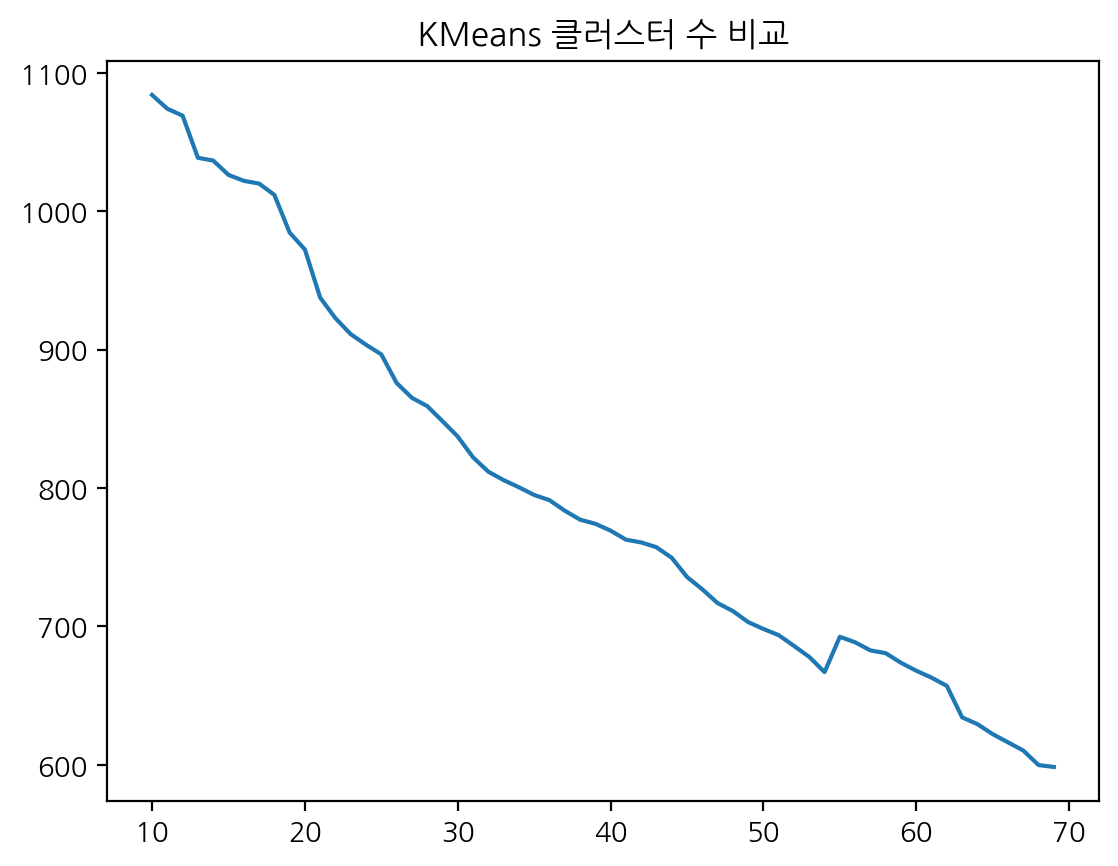

In [35]:
plt.plot(range(start, end), inertia)
plt.title("KMeans 클러스터 수 비교")

In [36]:
n_clusters = 50
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(feature_tfidf)
prediction = kmeans.predict(feature_tfidf)
df["cluster"] = prediction

In [37]:
df["cluster"].value_counts().head(10)

cluster
0     1718
3       44
19      42
11      36
7       32
6       29
2       27
8       26
16      24
31      23
Name: count, dtype: int64

In [38]:
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

for i in trange(start, end):
    mkmeans = MiniBatchKMeans(n_clusters=i, random_state=42)
    mkmeans.fit(feature_tfidf)
    b_inertia.append(mkmeans.inertia_)

100%|██████████| 60/60 [00:46<00:00,  1.29it/s]


Text(0.5, 1.0, 'MiniBatchKMeans 클러스터 수 비교')

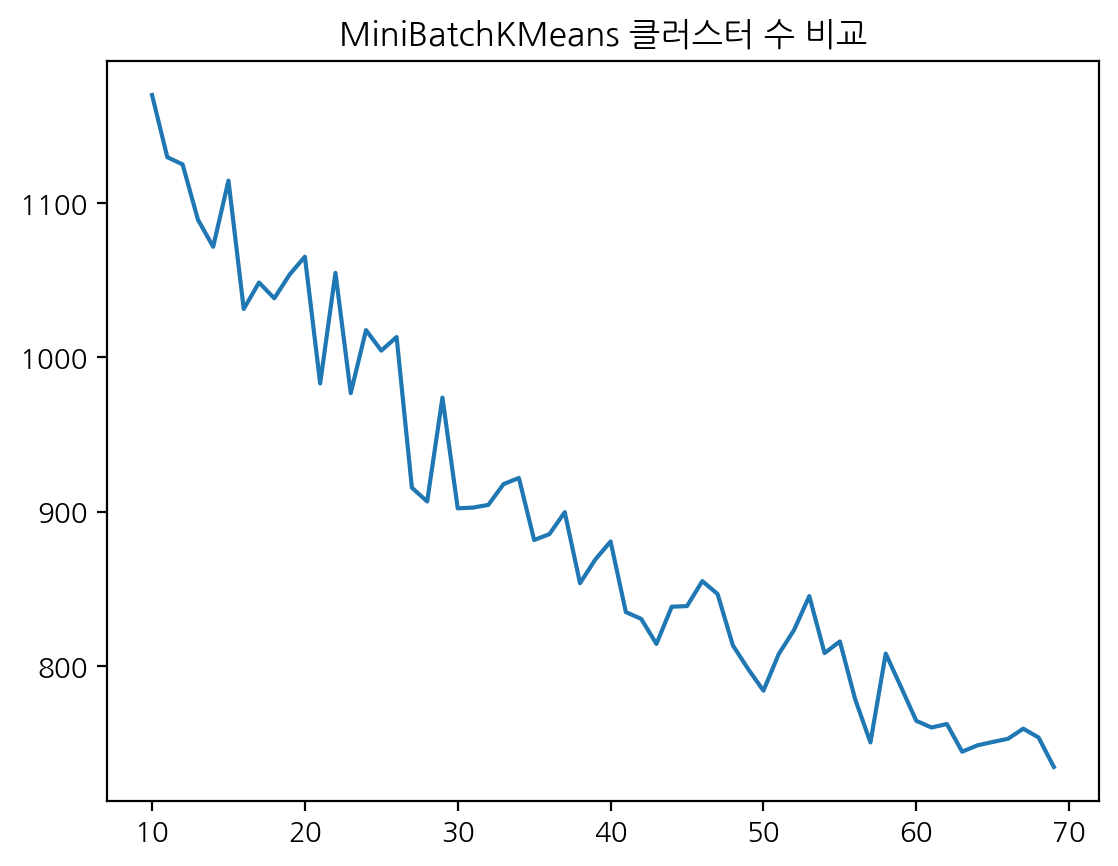

In [39]:
plt.plot(range(start, end), b_inertia)
plt.title("MiniBatchKMeans 클러스터 수 비교")

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

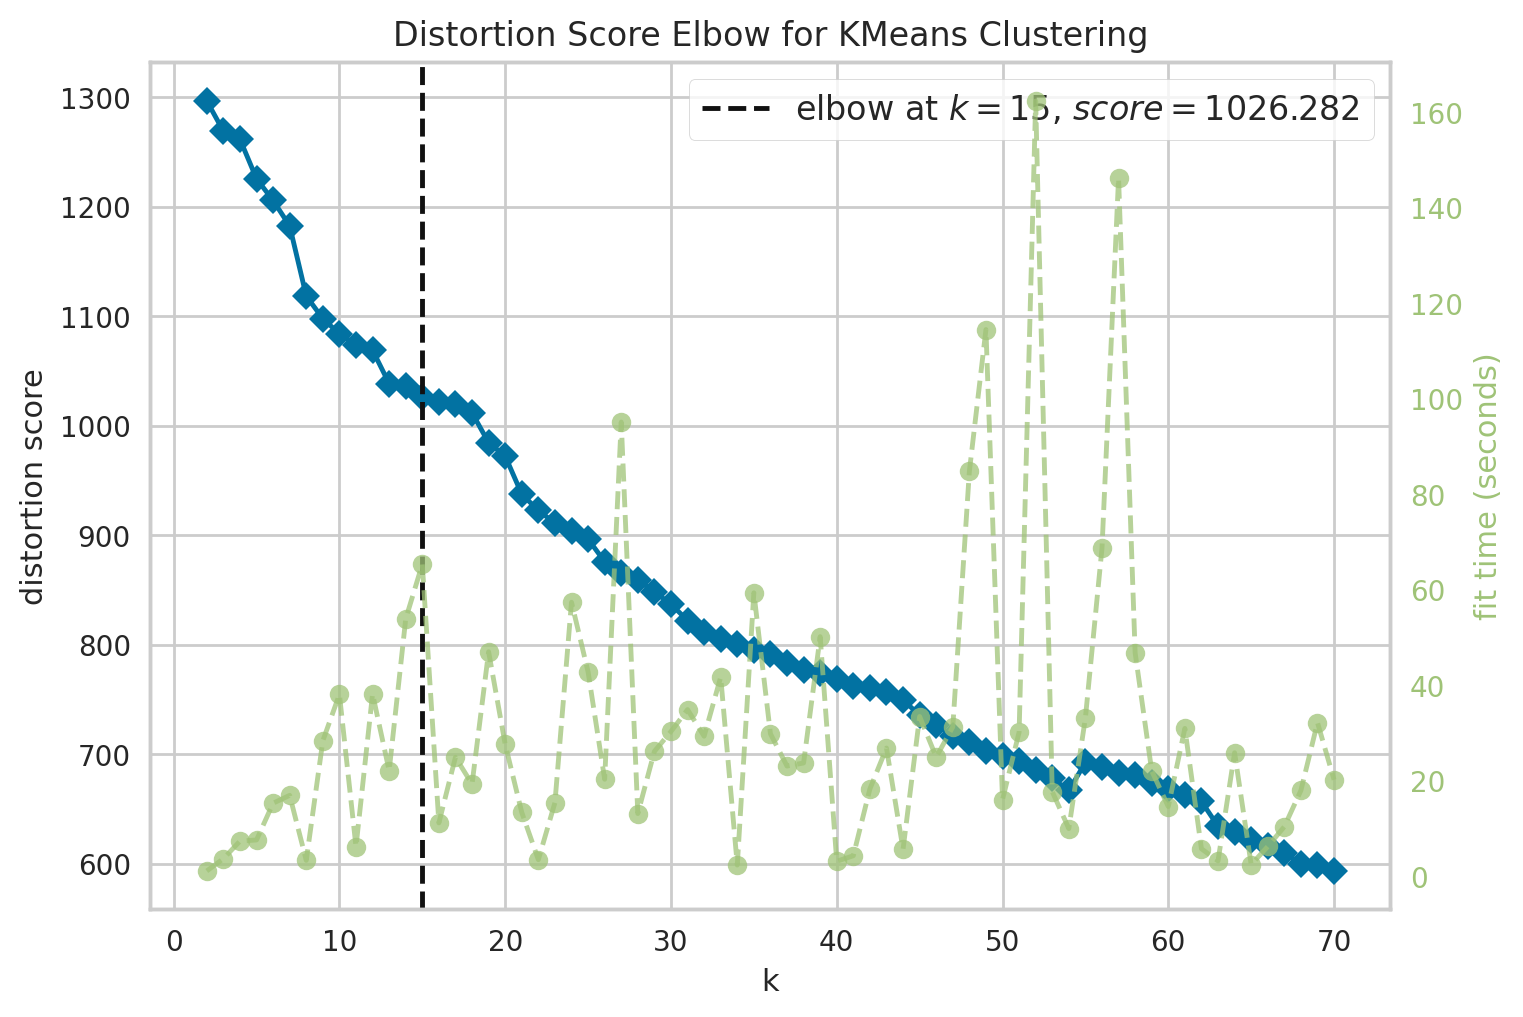

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
from yellowbrick.cluster import KElbowVisualizer

KElbowM = KElbowVisualizer(kmeans, k=70)
KElbowM.fit(feature_tfidf.toarray())
KElbowM.show()

In [46]:
mkmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
mkmeans.fit(feature_tfidf)
prediction = mkmeans.predict(feature_tfidf)
df["bcluster"] = prediction

#df["bcluster"].value_counts().head(10)
df["bcluster"].value_counts()

bcluster
34    1117
0      291
1      123
43      59
6       56
5       56
11      49
44      37
9       34
8       33
32      32
20      29
46      26
30      26
12      25
33      25
27      24
38      22
3       22
42      21
40      20
15      19
4       18
23      17
2       16
22      16
29      16
14      13
37      13
39      13
35      11
13      10
28      10
7       10
31      10
48      10
17       9
36       9
16       8
10       7
21       7
41       6
18       6
49       6
25       6
19       6
45       5
24       3
47       2
26       1
Name: count, dtype: int64

In [44]:
df.loc[df["bcluster"]==21, "course"].value_counts().head(1)

course
sql/db(mysql) 기본부터 파이썬/데이터분석 활용까지!    2
Name: count, dtype: int64

In [45]:
df.loc[df["bcluster"]==21, ["bcluster", "cluster", "course"]]

,bcluster,cluster,course
608,21,18,데이터 분석을 끝내고 싶다.\n#관심과목 sql/db(mysql) 기본부터 파이썬/...
937,21,18,는 sql/db(mysql) 기본부터 파이썬/데이터분석 활용까지 입니다.
1017,21,18,"sql/db(mysql) 기본부터 파이썬/데이터분석 활용까지!,\n***의 파이썬..."
1090,21,18,sql/db(mysql) 기본부터 파이썬/데이터분석 활용까지!\n\n이 강의 꼭 듣...
1109,21,18,- sql/db(mysql)기본부터 파이썬/데이터분석 활용까지!
2123,21,18,sql/db(mysql) 기본부터 파이썬/데이터분석 활용까지!
2135,21,18,sql/db(mysql) 기본부터 파이썬/데이터분석 활용까지!


In [48]:
df.loc[df["bcluster"]==24, ["bcluster", "cluster", "origin_text", "course"]]

,bcluster,cluster,origin_text,course
862,24,0,인프런에서 초석을 다시 다지고 스프링을 마스터 해보겠습니다.\n#관심강의 : 스프링...,"스프링 데이터 jpa, 스프링 boot 입문"
2166,24,31,2020년 1년동안 자바와 스프링을 열심히 공부해서\n웹 백엔드 개발자가 되고 싶습...,"- 스프링 웹 mvc, 스프링 데이터 jpa"
2242,24,31,인프런은 저의 부족한 개발지식을 채워주는 곳입니다.\n인프런을 통해 올해 더 좋은 ...,인프런은 저의 부족한 개발지식을 채워주는 곳입니다.\n인프런을 통해 올해 더 좋은 ...


In [51]:
feature_array = feature_vector.toarray()
feature_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [52]:
labels = np.unique(prediction)
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int32)

In [66]:
df_cluster_score = []
df_cluster = []
for label in labels:
    id_temp = np.where(prediction==label)
    x_means = np.mean(feature_array[id_temp], axis=0)
    sorted_means = np.argsort(x_means)[::-1][:n_clusters]
    features = vectorizer.get_feature_names_out()
    best_features = [(features[i], x_means[i]) for i in sorted_means]
                     
    df_score = pd.DataFrame(best_features, columns = ['features', 'score'])
    df_cluster_score.append(df_score)
    df_cluster.append(best_features[0])

In [68]:
pd.DataFrame(df_cluster, columns = ['features', 'score']).sort_values(by=["features", "score"], ascending=False)

,features,score
27,함수형 프로그래밍과 자바스크립트,1.000000
29,프로그래밍과 자바스크립트 es6,1.250000
25,파이썬입문과 크롤링기초 부트캠프 쉽게,1.000000
14,파이썬 입문 크롤링을 활용한,1.000000
1,파이썬 알고리즘 문제풀이,0.146341
26,파이썬 실전 활용,1.000000
30,파이썬 실전 활용,1.000000
9,파이썬 머신러닝 완벽 가이드,1.000000
21,파이썬 데이터분석 활용까지,1.000000
46,코틀린 기반 안드로이드,0.192308


In [67]:
df_cluster

[('2020년 공부 목표', np.float64(0.08247422680412371)),
 ('파이썬 알고리즘 문제풀이', np.float64(0.14634146341463414)),
 ('실전 스프링 부트와 jpa', np.float64(1.125)),
 ('자바 애플리케이션을 테스트하는 다양한 방법', np.float64(1.0)),
 ('따라하며 배우는 c언어', np.float64(1.0)),
 ('중고급 자바스크립트의 근본적인', np.float64(0.10714285714285714)),
 ('정말 쉽게 풀어보는', np.float64(0.10714285714285714)),
 ('rest api 개발', np.float64(1.0)),
 ('누구나 있는 안드로이드', np.float64(0.12121212121212122)),
 ('파이썬 머신러닝 완벽 가이드', np.float64(1.0)),
 ('opencv 파이썬 딥러닝 영상처리 프로젝트', np.float64(1.0)),
 ('제주코딩베이스캠프 code festival', np.float64(0.10204081632653061)),
 ('스프링 부트 개념과', np.float64(1.0)),
 ('머신러닝 완벽 가이드', np.float64(0.9)),
 ('파이썬 입문 크롤링을 활용한', np.float64(1.0)),
 ('스프링 기반 rest', np.float64(1.0)),
 ('공공데이터로 파이썬 데이터', np.float64(1.0)),
 ('시작하는 머신러닝 입문', np.float64(1.0)),
 ('차별화된 엑셀 데이터 분석과 차트 시각화', np.float64(1.0)),
 ('nodebird sns 만들기', np.float64(1.1666666666666667)),
 ('취업을 위한 알고리즘 입문', np.float64(1.0)),
 ('파이썬 데이터분석 활용까지', np.float64(1.0)),
 ('대세는 쿠버네티스 기초편', np.float64(0.625)

In [71]:
df.loc[df["bcluster"]==28, ["bcluster", "cluster", "origin_text", "course"]]

,bcluster,cluster,origin_text,course
577,28,43,마크업 개발 3년차예요~ 맡은 업무가 Vue 환경에서 마크업 작업을 하게되어 관심있...,실습 ui 개발로 배워보는 순수 자바스크립트 와 vuejs 개발
666,28,43,"신입 퍼블리셔로 재직중인데, 열심히 해서 프론트엔드 개발자로 성장하고 싶습니다.\n...",실습 ui 개발로 배워보는 순수 자바스크립트 와 vuejs 개발
734,28,43,내년이면 취업해야되는데 비전공자라 막막합니다. 프론트엔드 취업을 목표로 인프런 강의...,실습 ui 개발로 배워보는 순수 자바scrip 와 vuejs 개발
1057,28,43,2020 목표 : 풀스택 개발자\n관심 강의 : React로 NodeBird SNS...,"리액트로 nodebird sns 만들기, 리액트로 구현하는 블록체인 이더리움 d..."
1241,28,43,"4년째 일에 밀리고, 비프로그램형 뇌에 좌절하고, 잠에 밀린 자바스크립트, 올해 다...","4년째 일에 밀리고, 비프로그램형 뇌에 좌절하고, 잠에 밀린 자바스크립트, 올해 다..."
1656,28,43,"올해로 지천명 혹은 반백의 나이...하지만 지난 2,3년은 나의 의지와 관심만 있다...","실습 ui 개발로 배워보는 순수 자바스크립트 와 vuejs 개발, 파이썬입문과 크..."
2343,28,43,백엔드에 대해 좀 더 알아보고 싶어서 공부하고 있습니다! \n#관심강의: 실습 UI...,실습 ui 개발로 배워보는 순수 자바스크립트 와 vuejs 개발
2348,28,43,마크업 개발하고있는데 프론트앤드 개발에 관심이 많아서 \n열심히 공부해보려고 합니다...,실습 ui 개발로 배워보는 순수 자바스크립트 와 vuejs 개발
2381,28,43,"1년을 휴학 한 후, 진로에 대해 고민하며 공부하다가 올 해 다시 컴공과에 3학년으...",\n 자바스크립트 핵심 개념 알아보기 - js flow\n실습 ui 개발로 배워보는...
2430,28,43,이제 2년차에 진입한 개발자입니다. 현재 프론트와 백엔드를 같이 하고있지만 더 관심...,실습 ui 개발로 배워보는 순수 자바스크립트 와 vuejs 개발


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

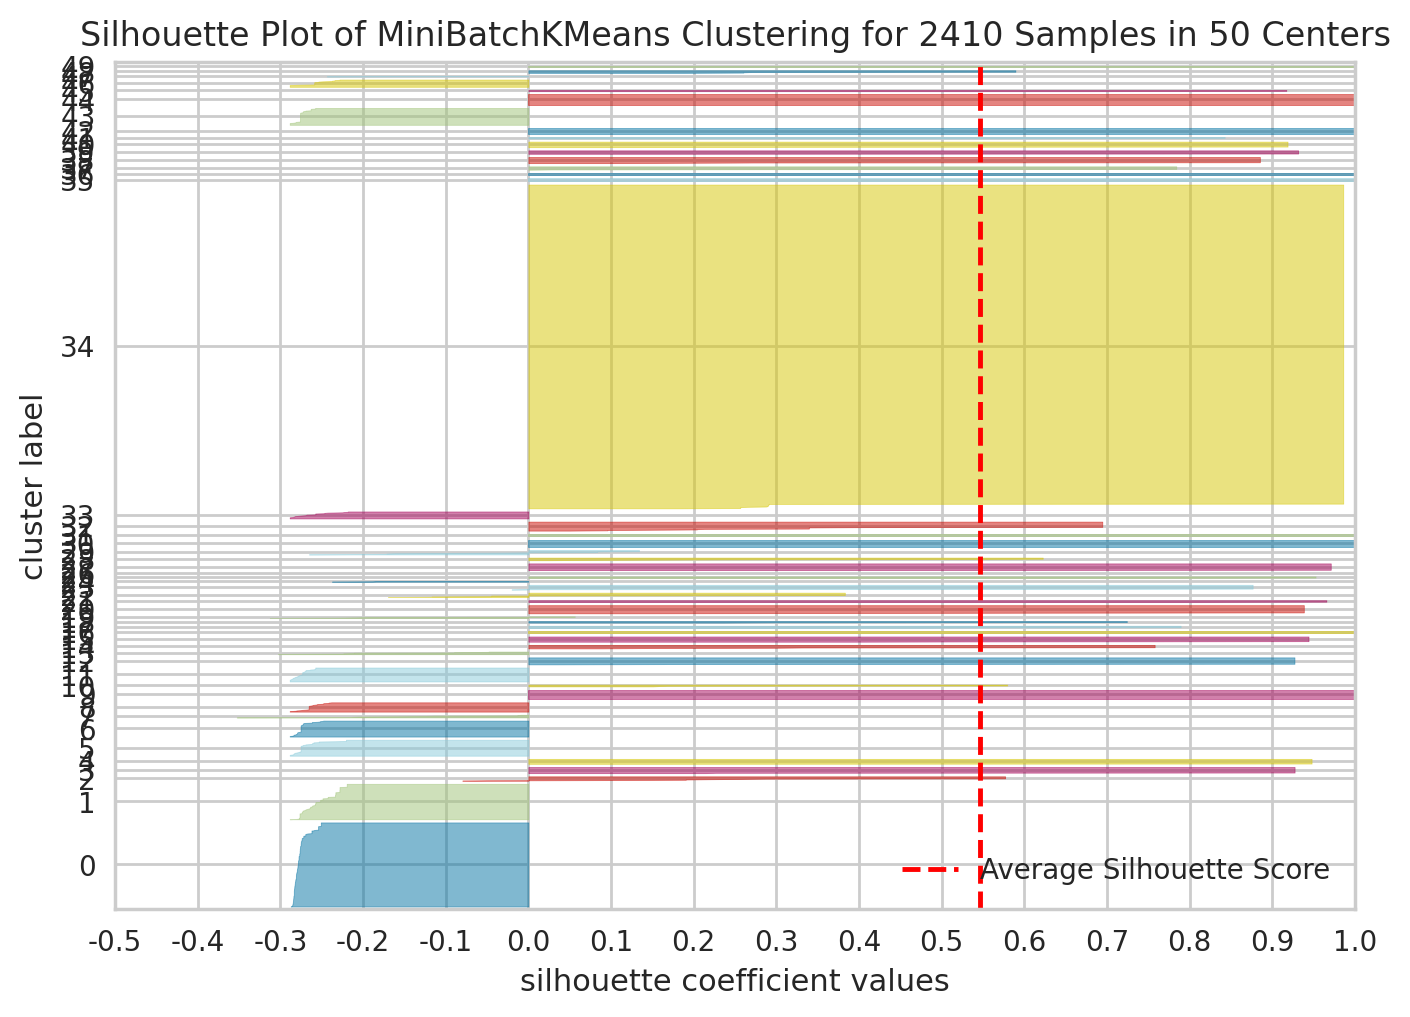

<Axes: title={'center': 'Silhouette Plot of MiniBatchKMeans Clustering for 2410 Samples in 50 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [75]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(mkmeans, colors='yellowbrick')

visualizer.fit(feature_tfidf.toarray())
visualizer.show()

In [13]:
import pandas as pd
 
# Sample bytes data
bytes_data = b'Name:John|Age:25|Occupation:Engineer\nName:Alice|Age:30|Occupation:Doctor\nName:Bob|Age:28|Occupation:Artist'
 
 
def parse_bytes_data(data):
    # Decode bytes data and split into records
    records = data.decode('utf-8').split('\n')
    parsed_data = []
    for record in records:
        if record:  # Skip empty records
            items = record.split('|')  # Split record into key-value pairs
            record_dict = {}
            for item in items:
                key, value = item.split(':')  # Split key-value pair
                record_dict[key] = value
            # Append record dictionary to parsed data
            parsed_data.append(record_dict)
            print(parsed_data)
    return pd.DataFrame(parsed_data)  # Create DataFrame from parsed data
 
 
# Convert bytes to DataFrame using custom parsing function
df_method3 = parse_bytes_data(bytes_data)
 
# Display the DataFrame
print(df_method3)

[{'Name': 'John', 'Age': '25', 'Occupation': 'Engineer'}]
[{'Name': 'John', 'Age': '25', 'Occupation': 'Engineer'}, {'Name': 'Alice', 'Age': '30', 'Occupation': 'Doctor'}]
[{'Name': 'John', 'Age': '25', 'Occupation': 'Engineer'}, {'Name': 'Alice', 'Age': '30', 'Occupation': 'Doctor'}, {'Name': 'Bob', 'Age': '28', 'Occupation': 'Artist'}]
    Name Age Occupation
0   John  25   Engineer
1  Alice  30     Doctor
2    Bob  28     Artist


In [12]:
df_method3['Name']

0     John
1    Alice
2      Bob
Name: Name, dtype: object